In [1]:
!python3 --version

Python 3.8.11


In [2]:
import pandas
from utils import calculate_percent_replicating_Target,calculate_percent_matching_Target
from utils import plot_simple_comparison, plot_two_comparisons
from utils import enforce_modality_match_order, enforce_timepoint_order, enforce_timepoint_order_in_plot, enforce_modality_match_order_in_plot

In [3]:
variable = 'Treatment timepoint'
variable_to_save = variable.replace(' ','_')

experiment_dict = {
    'A549':{
        'Compounds':{
            24:['BR00116991','BR00116992','BR00116993','BR00116994'],
            48:['BR00117015','BR00117016','BR00117017','BR00117019']},
        'ORF':{
            48:['BR00117020','BR00117021'],
            96:['BR00118050','BR00117006']},
        'CRISPR':{
            96:['BR00118041','BR00118042','BR00118043','BR00118044'],
            144:['BR00117000','BR00117003','BR00117004','BR00117005']}
            },
    'U2OS':{
        'Compounds':{
            24:['BR00116995','BR00117024','BR00117025','BR00117026'],
            48:['BR00117010','BR00117011','BR00117012','BR00117013']},
        'ORF':{
            48:['BR00117022','BR00117023'],
            96:['BR00118039','BR00118040']},
        'CRISPR':{
            96:['BR00118045','BR00118046','BR00118047','BR00118048'],
            144:['BR00116996','BR00116997','BR00116998','BR00116999' ]}
            }
    }


In [4]:

plate_df = pandas.DataFrame()

for eachline in list(experiment_dict.keys()):
    for eachmodality in list(experiment_dict[eachline].keys()):
        for eachtimepoint in list(experiment_dict[eachline][eachmodality].keys()):
            plate_df = plate_df.append({'Plate Name List' : experiment_dict[eachline][eachmodality][eachtimepoint], 
            variable : eachtimepoint, 'Cell Type' : eachline, 'Percent Replicating' : calculate_percent_replicating_Target(
                '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1',experiment_dict[eachline][eachmodality][eachtimepoint]),
                'Modality':eachmodality}, ignore_index=True)

/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


Saved to ../figures/Treatment timepoint-Percent Replicating-Cell Type-Modality-None.png


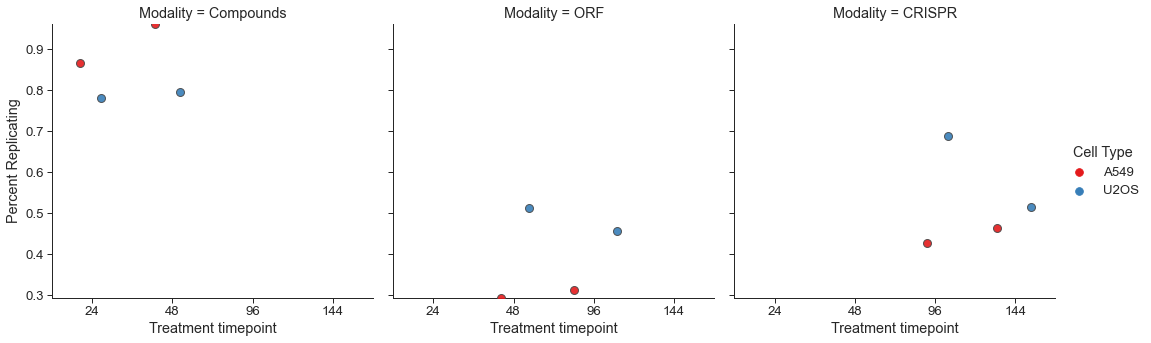

In [5]:
#You may find that running this a couple of times is needed to find a version where the jitter is about right
plot_simple_comparison(df=plate_df,x=variable,hue='Cell Type',col = 'Modality')

In [6]:
plate_df.to_csv(f'checkpoint_csvs/{variable_to_save}-replicating.csv',index=False)

In [7]:
variable = 'Treatment timepoint'

plate_match_df = pandas.DataFrame()

comparison_list = []

for eachline in list(experiment_dict.keys()):
    for eachmodality1 in list(experiment_dict[eachline].keys()):
        for eachmodality2 in list(experiment_dict[eachline].keys()):
            for eachtimepoint1 in list(experiment_dict[eachline][eachmodality1].keys()):
                for eachtimepoint2 in list(experiment_dict[eachline][eachmodality2].keys()):
                    string1 = f"{eachline}-{eachmodality1}-{eachtimepoint1}"
                    string2 = f"{eachline}-{eachmodality2}-{eachtimepoint2}"
                    if string1 != string2:
                        if f"{string1}-{string2}" not in comparison_list:
                            if f"{string2}-{string1}" not in comparison_list:
                                comparison_list.append(f"{string1}-{string2}")
                                plate_match_df = plate_match_df.append({'Percent Matching' : calculate_percent_matching_Target(
                                    '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1',
                                    experiment_dict[eachline][eachmodality1][eachtimepoint1],eachmodality1, 
                                    '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1',
                                    experiment_dict[eachline][eachmodality2][eachtimepoint2],eachmodality2),
                                    'Modality 1':eachmodality1,'Modality 2':eachmodality2, 'Modality Match':enforce_modality_match_order(eachmodality1,eachmodality2),
                                    variable:enforce_timepoint_order(eachtimepoint1,eachtimepoint2),'Cell Type':eachline}, ignore_index=True)


In [11]:
hue_order = enforce_timepoint_order_in_plot(list(plate_match_df['Treatment timepoint']))
col_order = enforce_modality_match_order_in_plot(list(plate_match_df['Modality Match']))

x = 'Cell Type'
y = 'Percent Matching'
hue = variable
col = 'Modality Match'

Saved to ../figures/Cell Type-Percent Matching-Treatment timepoint-Modality Match.png


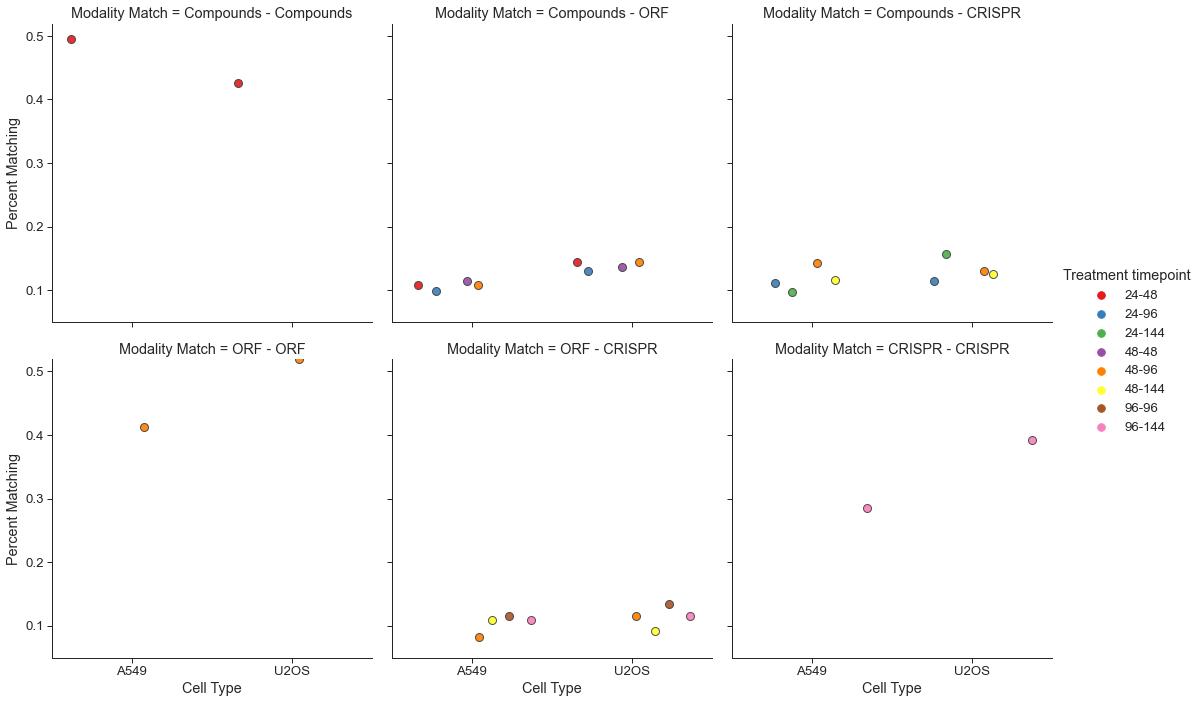

In [12]:
plot_simple_comparison(df=plate_match_df,x=x,y=y,hue=hue,
hue_order=hue_order, col = col, col_order = col_order, col_wrap=3,ylim=[0.05,0.4],
plotname=f"{x}-{y}-{hue}-{col}.png")

In [10]:
plate_match_df.to_csv(f'checkpoint_csvs/{variable_to_save}-matching.csv',index=False)